In [94]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
# Loading dataset
insurance = pd.read_csv("/insurance.csv")
df = insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# First look to the dataset
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
# Checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Correlation
df.corr()

<ipython-input-11-6fc543ac6a6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Categorical Variable Review

In [ ]:
# Looking at the columns having "category" datatype to know which categorical value has how many data instances
cat_df = df.select_dtypes(include = "category")
cat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
cat_df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
cat_df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
cat_df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# Reaching the ratios of the classes of the categorical variable
cat_df.value_counts()

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
female  no      northeast    132
male    no      northwest    132
                southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
                northeast     29
                northwest     29
male    yes     northwest     29
female  yes     southwest     21
dtype: int64

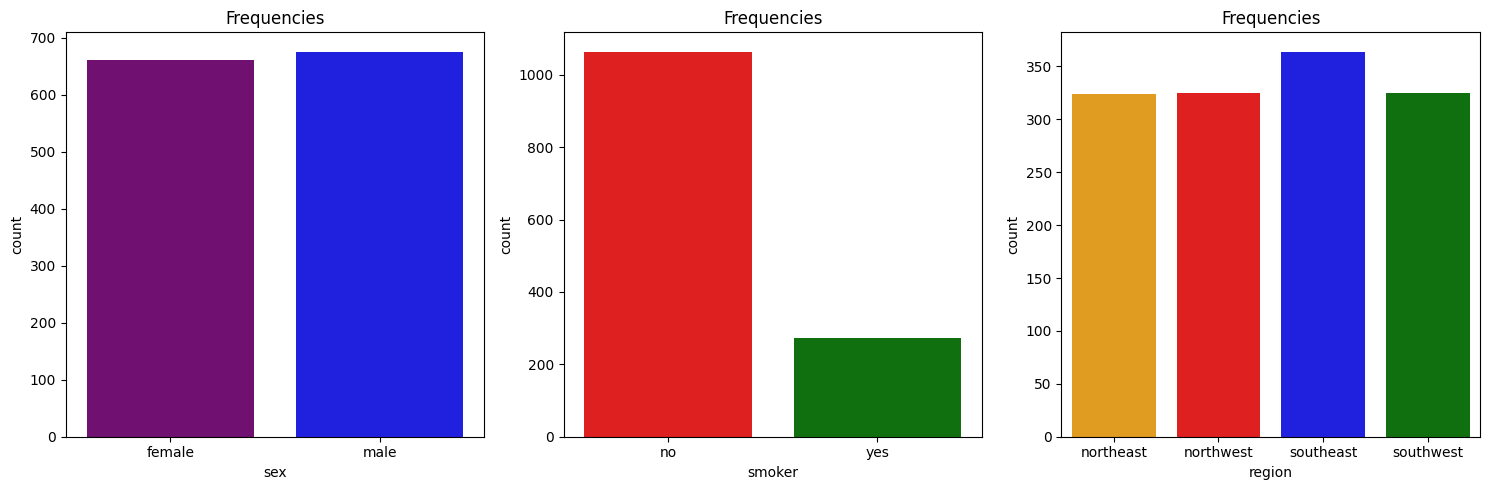

In [ ]:
# Visualization of classes of categorical variables by frequency
columns_to_plot = ["sex", "smoker","region"]
palette_sex = {"male": "blue", "female": "purple"}
palette_smoker = {"yes": "green", "no": "red"}
palette_region = {"northeast": "orange", "southeast": "blue", "southwest": "green", "northwest": "red"}

plt.figure(figsize=(15, 5))

for column in columns_to_plot:
    plt.subplot(1, len(columns_to_plot), columns_to_plot.index(column) + 1)

    if column == "sex":
        sns.countplot(data = cat_df, x = column, palette = palette_sex)
    elif column == "smoker":
        sns.countplot(data = cat_df, x = column, palette = palette_smoker)
    elif column == "region":
        sns.countplot(data = cat_df, x = column, palette = palette_region)

    plt.title("Frequencies")
plt.tight_layout()
plt.show()

# Numerical Variable Review

In [3]:
df_num = df.select_dtypes(include = ["float64","int64"])
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [ ]:
# A detailed examination of all numerical variables
for column in df_num.columns:
    print("Column:", column)
    print("Mean:", df_num[column].mean())
    print("Number of Non-null Entries:", df_num[column].count())
    print("Maximum Value:", df_num[column].max())
    print("Minimum Value:", df_num[column].min())
    print("Median:", df_num[column].median())
    print("Standard Deviation:", df_num[column].std())

    q1 = np.percentile(df_num[column], 25)
    q3 = np.percentile(df_num[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print("1st Quartile (Q1):", q1)
    print("3rd Quartile (Q3):", q3)
    print("Interquartile Range (IQR):", iqr)
    print("Lower Bound:", lower_bound)
    print("Upper Bound:", upper_bound)

    print("\n")

Column: age
Description:
 count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
Mean: 39.20702541106129
Number of Non-null Entries: 1338
Maximum Value: 64
Minimum Value: 18
Median: 39.0
Standard Deviation: 14.049960379216154


Column: bmi
Description:
 count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
Mean: 30.66339686098655
Number of Non-null Entries: 1338
Maximum Value: 53.13
Minimum Value: 15.96
Median: 30.4
Standard Deviation: 6.098186911679014


Column: children
Description:
 count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
Mean: 1.0949177877429
Number of

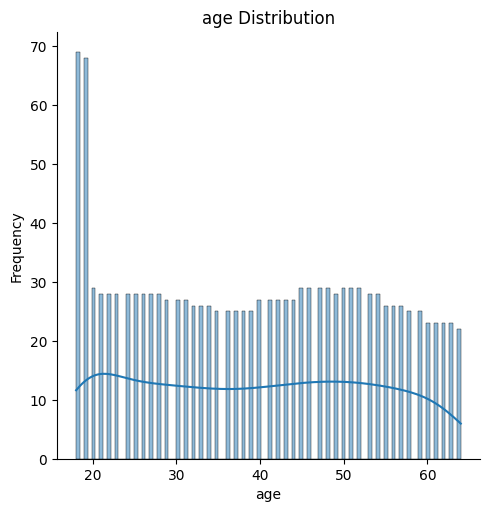

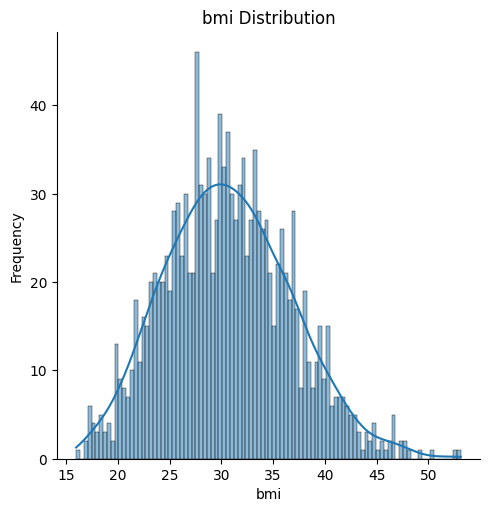

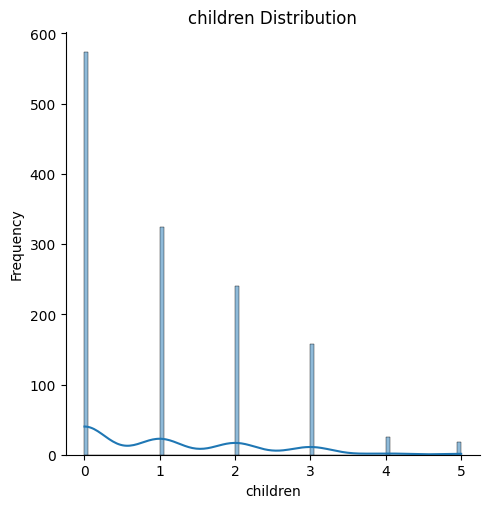

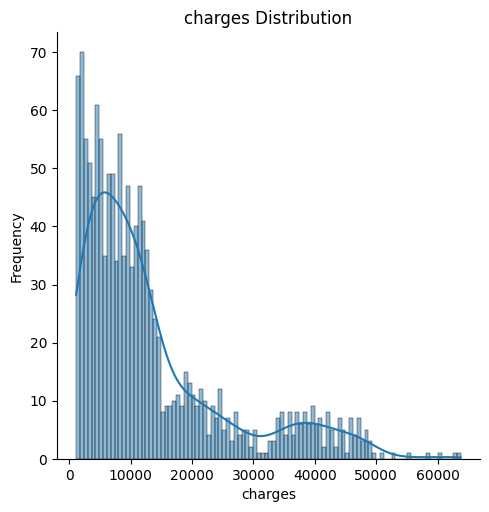

In [ ]:
# To see and understand the numerical data with a histogram

for column in df_num.columns:
    sns.displot(data=df_num, x=column, kde=True, bins = 100)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

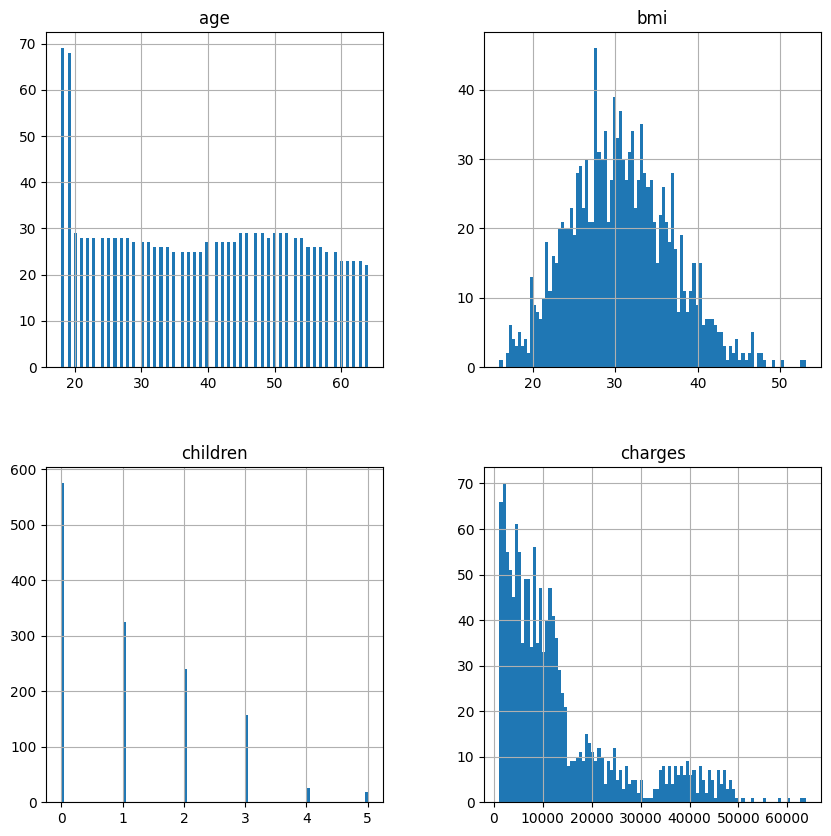

In [ ]:
# Another way to visualize numeric veriables
df_num.hist(bins=100, figsize = (10,10));

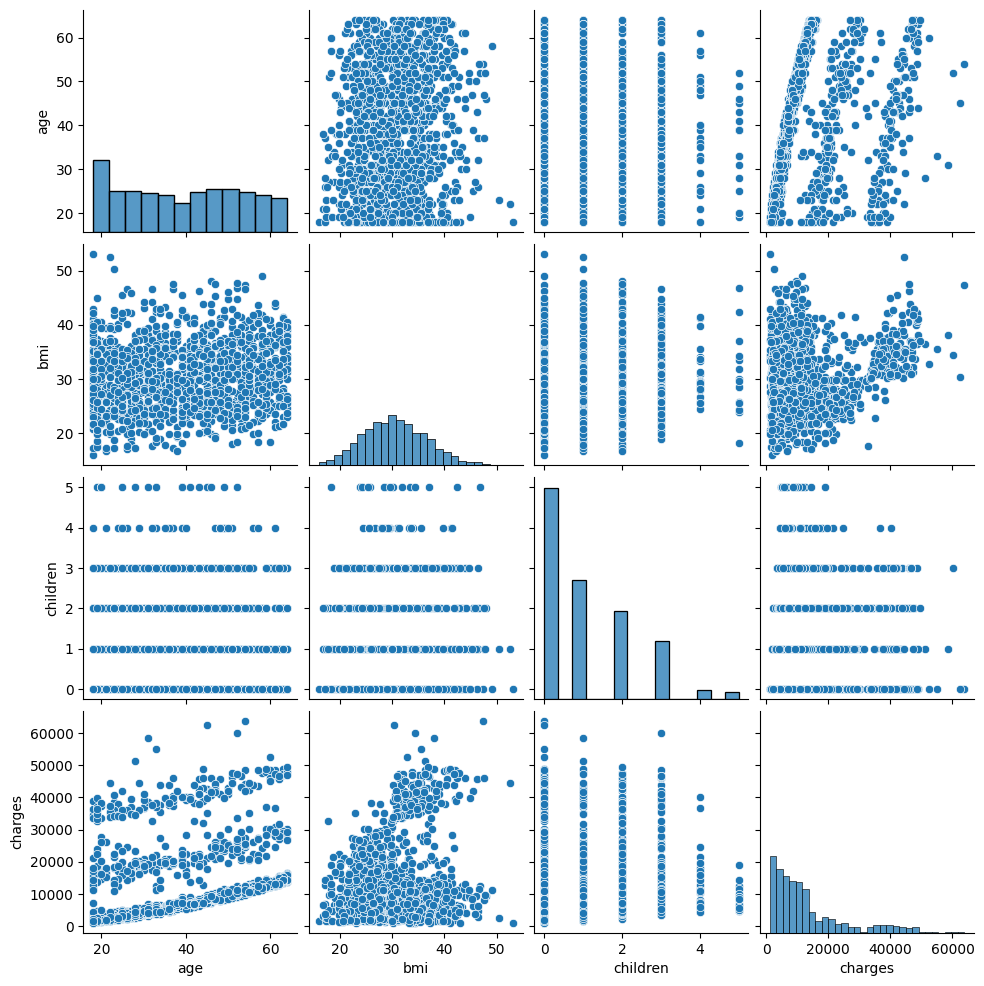

In [13]:
sns.pairplot(df_num);

- As we can see, age and charges seems to have some unique relationship as it has 3 linear lines.

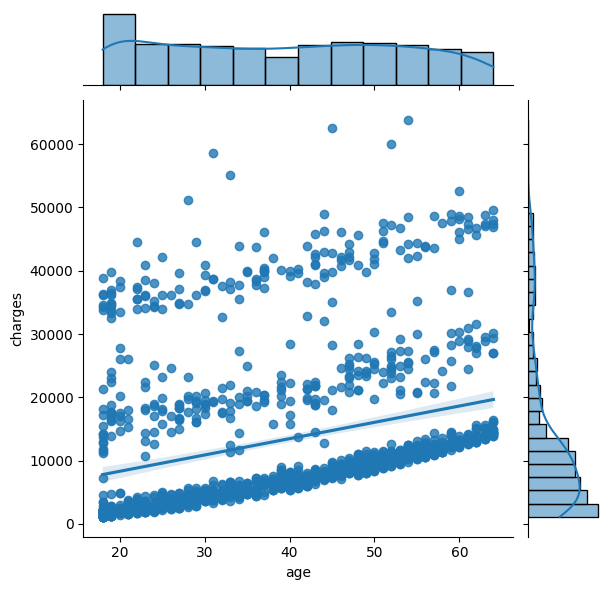

In [16]:
sns.jointplot(x = "age", y = "charges", data = df_num, kind = "reg")
plt.show()

-----

## Examination of the BMI distrubition


In [ ]:
# Checking BMI distribution with shapiro-wilk tests

stat, p = shapiro(df["bmi"])
alpha = 0.05

print("Shapiro-Wilk Test p-value:", p)
if p > alpha:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")

Shapiro-Wilk Test p-value: 2.6033414542325772e-05
The data does not follow a normal distribution.


Text(0, 0.5, 'Sample Quantiles')

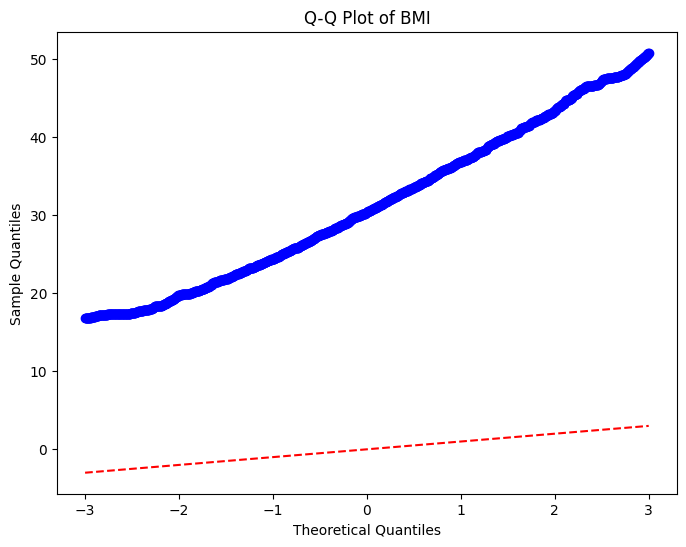

In [ ]:
# Checking whether it has a normal distribution with the q-q plot

# Generating a random sample data
sample = df["bmi"]

# Creating theoretical quantiles
theoretical_quantiles = np.linspace(-3, 3, len(sample))

# Calculating sample quantiles
sample_quantiles = np.percentile(sample, stats.norm.cdf(theoretical_quantiles) * 100)

plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles, sample_quantiles, color='blue')
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')
plt.title("Q-Q Plot of BMI")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

### Conclusion of BMI's distrubition

- We have two methods to observe the distribution of BMI: one involves using the Shapiro-Wilk test and visualizing it with a Q-Q plot. Through this visualization, we hope to see the blue dots, representing the data points, densely distributed along the red line. The Shapiro-Wilk test helps determine whether the data follows a normal distribution, but to be more certain, I also employed the Q-Q plot method. By observing both, we can make a more accurate conclusion. In the end, the BMI variable does not exhibit a normal distribution, suggesting the need for non-parametric tests to proceed.

---

# Examining the Relationship Between Variables

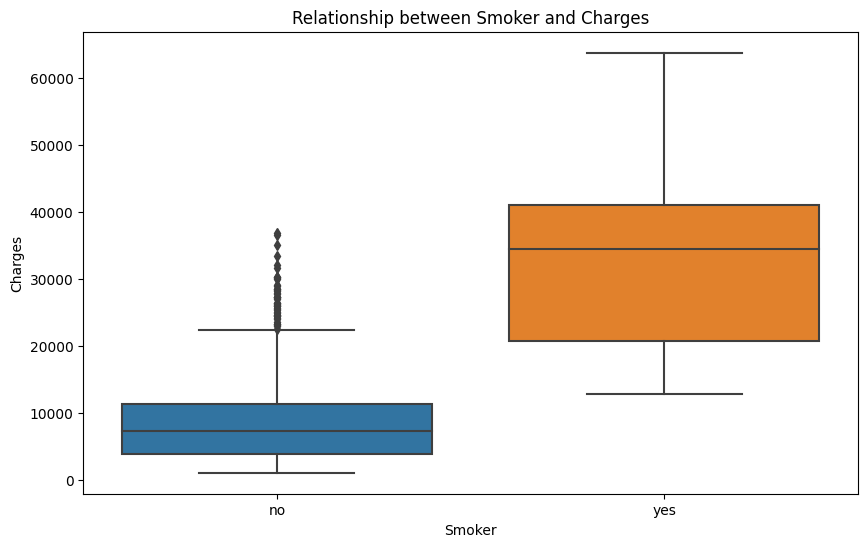

In [ ]:
# Examination of the relationship between “smoker” and “charges”

plt.figure(figsize = (10, 6))
sns.boxplot(x = "smoker", y = "charges", data = df)
plt.title("Relationship between Smoker and Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

### Conclusion of the relationship between "smoker" and "charges
- As observed, it has been revealed that the expenses incurred by smokers are higher compared to those who do not smoke. There is a relationship between them

Text(0, 0.5, 'Count')

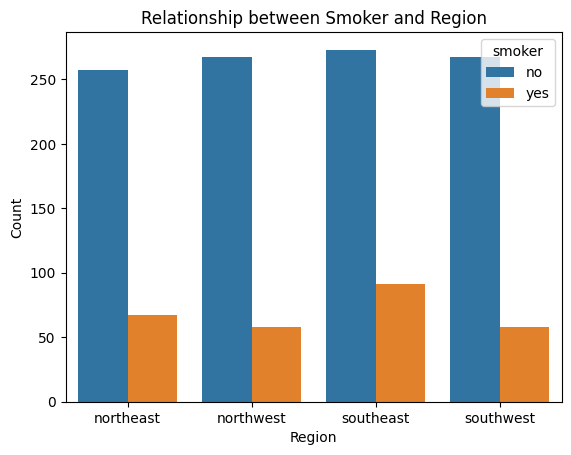

In [ ]:
# Examination of the relationship between “smoker” and “region”.
# In here there are two categorical veriables

sns.countplot(x = "region", hue = "smoker", data = df);
plt.title("Relationship between Smoker and Region")
plt.xlabel("Region")
plt.ylabel("Count")

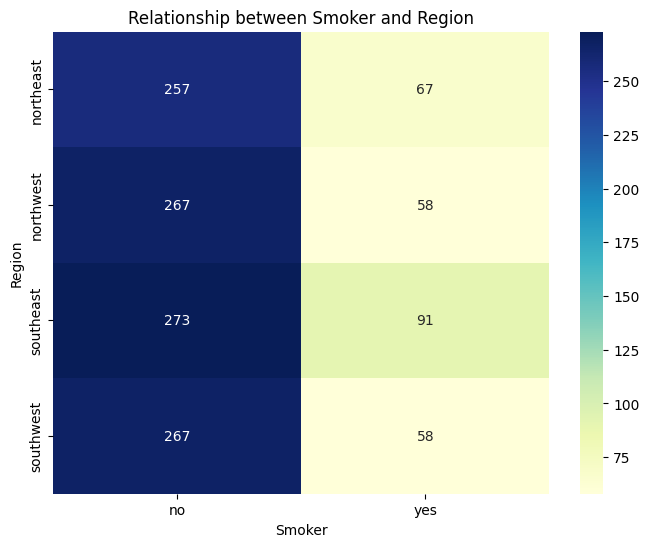

In [ ]:
# Another way to examine the relationship between smoker and region
cross_tab = pd.crosstab(df["region"], df["smoker"])
plt.figure(figsize = (8, 6))
sns.heatmap(cross_tab, annot = True, cmap = "YlGnBu", fmt = "d")
plt.title("Relationship between Smoker and Region")
plt.xlabel("Smoker")
plt.ylabel("Region")
plt.show()

### Conclusion of the relationship between “smoker” and “region”

- The region with the highest number of both smokers and non-smokers is the "southeast" region. Additionally, it can be observed that the number of non-smokers is also considerably high.

Text(0, 0.5, 'BMI')

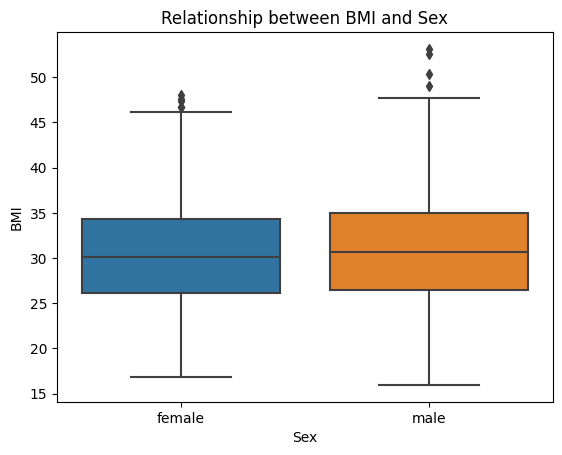

In [ ]:
# Examination of the relationship between “bmi” and “sex”.

# Values are too close to give certain conclusion so I'm going to create another plot
sns.boxplot(x= "sex", y ="bmi", data = df);
plt.title("Relationship between BMI and Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")

Text(0, 0.5, 'BMI')

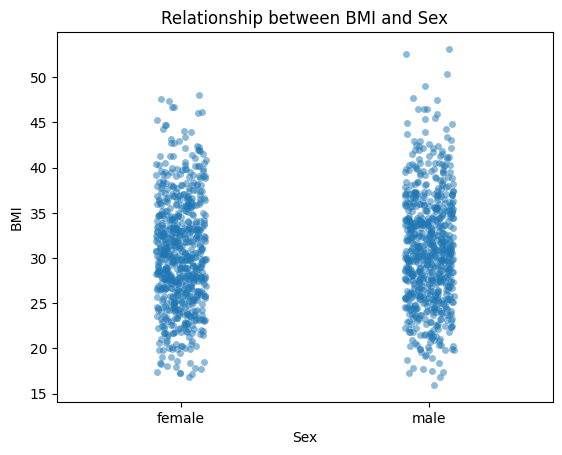

In [ ]:
sns.stripplot(x = "sex", y = "bmi", jitter=True, alpha=0.5, data=df)
plt.title("Relationship between BMI and Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")

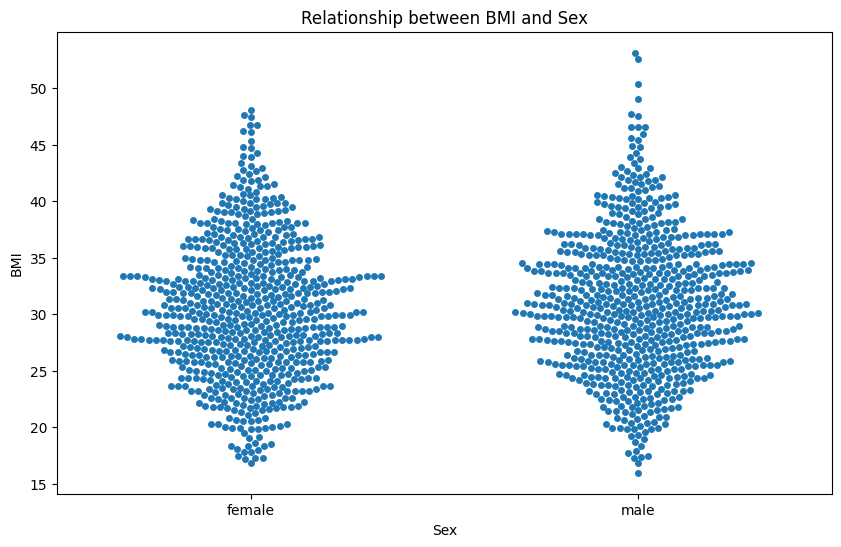

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x = "sex", y = "bmi", data = df)
plt.title("Relationship between BMI and Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

### Conclusion of the relationship between “bmi” and “sex”

- Upon examining the initial box plot, where the values appear to be very close, I decided to employ alternative visualization techniques. As a result, I arrived at the following observation: Within both genders, accumulations are predominantly within the range of 25-35 values, and the median values are quite similar to each other. However, as the BMI values surpass 35 and increase, these accumulations tend to diminish and decrease. This is particularly noticeable in the case of males, where higher BMI values are more prevalent compared to females.

Please note that, considering the close proximity of values, making definitive conclusions is challenging. Therefore, I resorted to other visualization methods to gain a more nuanced understanding of the relationship between the variables.

In [ ]:
# Finding the "region" with the most "children

region_child_sum = df.groupby("region")["children"].sum()
print("Total children count: ", region_child_sum)

most_children_region = region_child_sum.idxmax()
print("The region with the most children:", most_children_region)

Total children count:  region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64
The region with the most children: southeast


### The Highest number of children
- The highest number of children is found in the "southeast" region.

Text(0, 0.5, 'BMI')

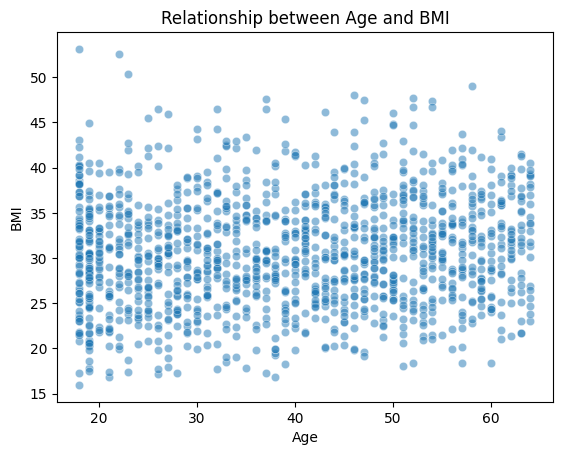

In [ ]:
# Examination the relationship between “age” and “bmi”.

sns.scatterplot(x = "age", y = "bmi", data = df, alpha = 0.5);
plt.title("Relationship between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")

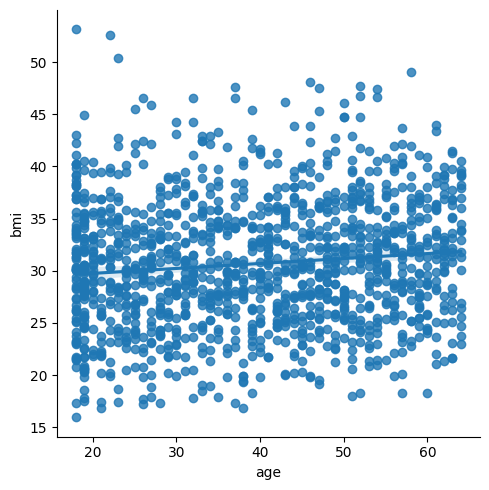

In [ ]:
# Representation of linear relationship

sns.lmplot(x = "age", y = "bmi", data = df);

Text(0, 0.5, 'BMI')

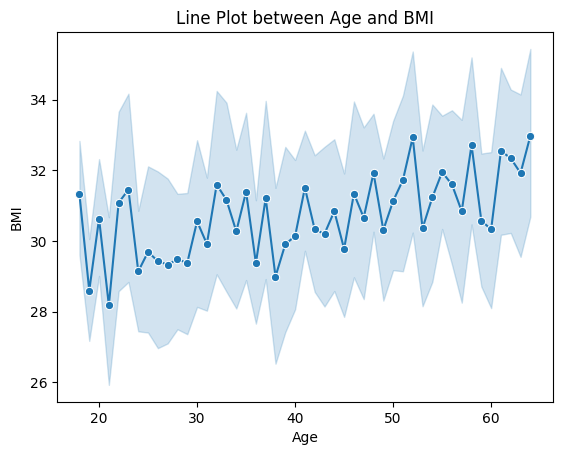

In [ ]:
sns.lineplot(data=df, x="age", y="bmi", marker = "o")
plt.title("Line Plot between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")

In [ ]:
# Couldn't find out a visual relationship through scatter plot and lmplot so I wanted to check correlation between age and bmi

correlation_coefficient = df["age"].corr(df["bmi"])

print("Correlation Coefficient between Age and BMI:", correlation_coefficient)

Correlation Coefficient between Age and BMI: 0.1092718815485352


### Conclusion of the relationship between “bmi” and “age”

- The reason for calculating the correlation coefficient is due to the fact that the visualizations do not exhibit a clear distribution, density, or significant insights, making it challenging to derive meaningful interpretations. Therefore, I sought to examine the correlation coefficients between the variables. Additionally, as evident in the last graph, while BMI values are lowest in the 20-30 age range, and if the age is above 60, BMI values tend to be higher. However, I emphasize once again that we cannot definitively assert a causal relationship solely based on visual observations.

- The correlation coefficient value of 0.109 indicates a positive correlation between the "age" and "bmi" variables. However, the value is relatively close to zero, which suggests a weak positive correlation. This means that as age increases, there is a slight tendency for BMI to increase as well, but the relationship is not strong. It's important to note that a correlation coefficient close to zero does not necessarily imply a strong linear relationship between the variables (which is I showed it above).


Text(0, 0.5, 'BMI')

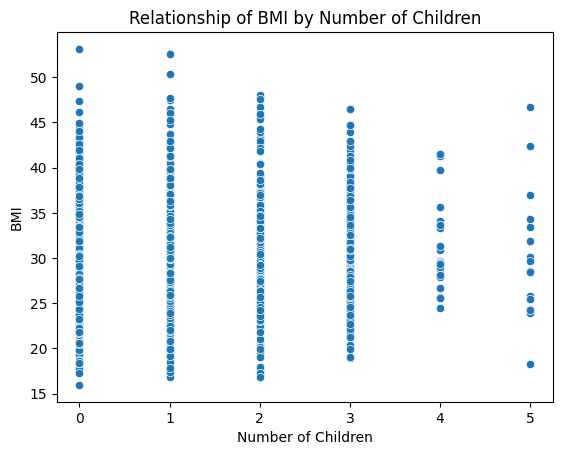

In [ ]:
# Examination of the relationship between “bmi” and “children”.

sns.scatterplot(y = "bmi", x = "children", data = df);
plt.title("Relationship of BMI by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("BMI")

Text(0, 0.5, 'BMI')

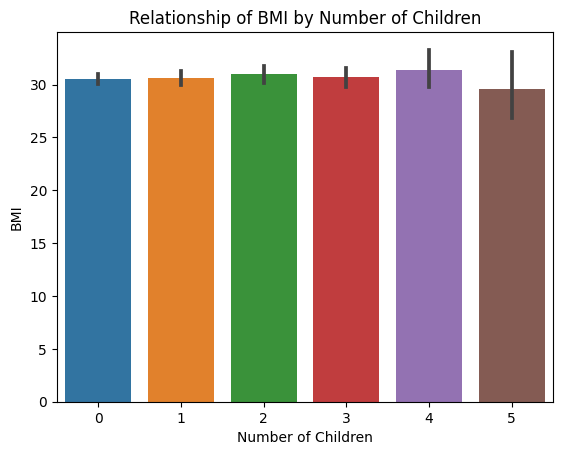

In [ ]:
sns.barplot(x = "children", y = "bmi", data = df)
plt.title("Relationship of BMI by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("BMI")

In [ ]:
correlation_coefficient = df["bmi"].corr(df["children"])

print("Correlation Coefficient between Age and BMI:", correlation_coefficient)

Correlation Coefficient between Age and BMI: 0.012758900820673815


### Conclusion of the relationship between “bmi” and “children”

- In the relationship between BMI and the number of children, individuals with five children have the lowest average BMI values, while those with four children have the highest average BMI values. When examining the correlation coefficient between them, it is evident that there is a positive correlation, albeit nearly negligible.

Text(0, 0.5, 'BMI')

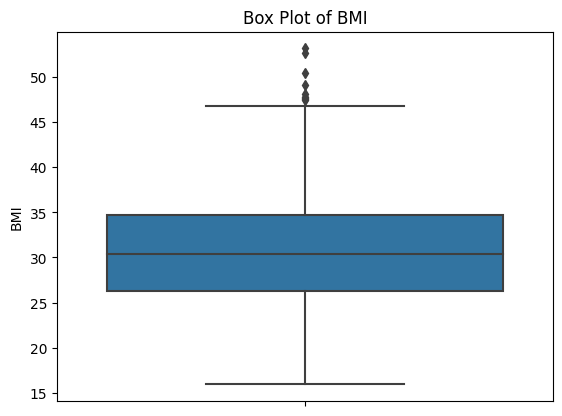

In [ ]:
#  Is there an outlier in the "bmi" variable? Please review.

sns.boxplot(y="bmi", data = df)
plt.title("Box Plot of BMI")
plt.ylabel("BMI")

-  There are data points that outside the whiskers of the box plot, they might be considered outliers.
- So now we will check for outliers using the IQR (Interquartile Range) method. We can calculate the IQR using the box plot technique for each data point in the 'bmi' variable.

In [ ]:
# Setting threshold with boxplot

df_bmi = df["bmi"]
df_bmi.head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

In [ ]:
Q1 = df_bmi.quantile(0.25)
Q3 = df_bmi.quantile(0.75)

IQR = Q3 - Q1

print("Q1:",Q1, "Q3:",Q3, "IQR:",IQR)

Q1: 26.29625 Q3: 34.69375 IQR: 8.3975


In [ ]:
# We will calculate a value based on the data point corresponding to the 25th percentile index and the one corresponding to the 75th percentile index through IQR (Interquartile Range).
# We will then calculate a threshold value based on the result obtained from this calculation.

lower_limit = Q1-1.5 * IQR
upper_limit = Q3+1.5 * IQR

print("Lower Limit:", lower_limit,
      "\n",
      "Upper Limit:", upper_limit)

Lower Limit: 13.7 
 Upper Limit: 47.290000000000006


In [ ]:
# We queried whether our table values are less than the lower limit

df_bmi < lower_limit

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool

In [ ]:
df_bmi > upper_limit

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool

In [ ]:
(df_bmi < lower_limit) | (df_bmi > upper_limit)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool

In [ ]:
# I consider those that do not conform to either the lower or upper limit threshold values as outliers.

outlier_tf = (df_bmi < lower_limit) | (df_bmi > upper_limit)

df_bmi[outlier_tf]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

Text(0, 0.5, 'Charges')

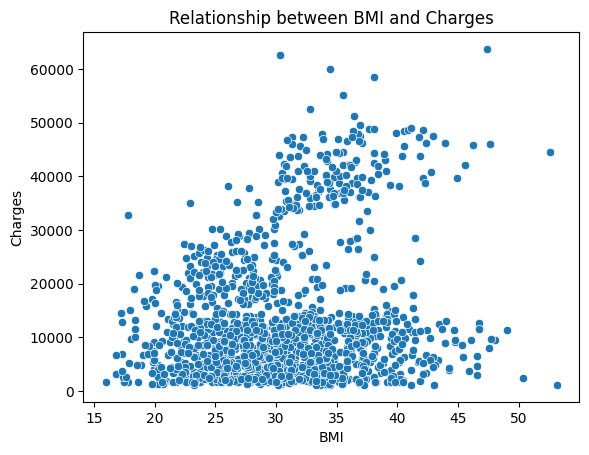

In [ ]:
# Examination of the relationship between “bmi” and “charges”

sns.scatterplot(x = "bmi", y = "charges", data = df)
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")

In [ ]:
correlation_coefficient = df["bmi"].corr(df["charges"])
print("Correlation Coefficient between BMI and Charges:", correlation_coefficient)

Correlation Coefficient between BMI and Charges: 0.19834096883362895


### Conclusion of the relationship between “bmi” and “charges”

- The correlation coefficient of 0.198 suggests a positive correlation between the "bmi" and "charges" variables. However, the value is relatively low, indicating a weak positive linear relationship between the two variables. This implies that there is a slight tendency for higher BMI values to be associated with slightly higher insurance charges, but the relationship is not strong.

## İmportant Not!
- ***Up to this point, I haven't checked whether the variables exhibit a normal distribution, which could potentially lead to misleading correlation coefficient results. However, upon examining the graphs, it seems that there isn't a strong relationship between the variables. Therefore, without conducting a normality test, I made interpretations based on the correlation coefficients as if the variables were normally distributed, which might not be accurate.***

Text(0, 0.5, 'BMI')

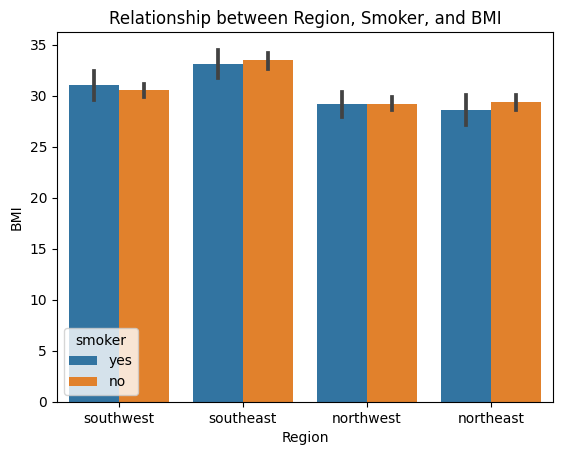

In [10]:
# Examination of the relationship between “region”, “smoker” and “bmi” using bar plot.

sns.barplot(x = "region", y = "bmi", hue = "smoker", data = df)
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")

### Conclusion of the relationship between “region”, “smoker” and “bmi” using bar plot
- It has been observed that individuals with the highest BMI values are predominantly located in the southeast region, and non-smokers generally exhibit slightly higher BMI values compared to smokers. In the northwest, which is the region with the least smokers and non-smokers, BMI values appear to be similar, ignoring the standard deviations.

Text(0.5, 0.98, 'Relationship between BMI, Charges, and Other Factors')

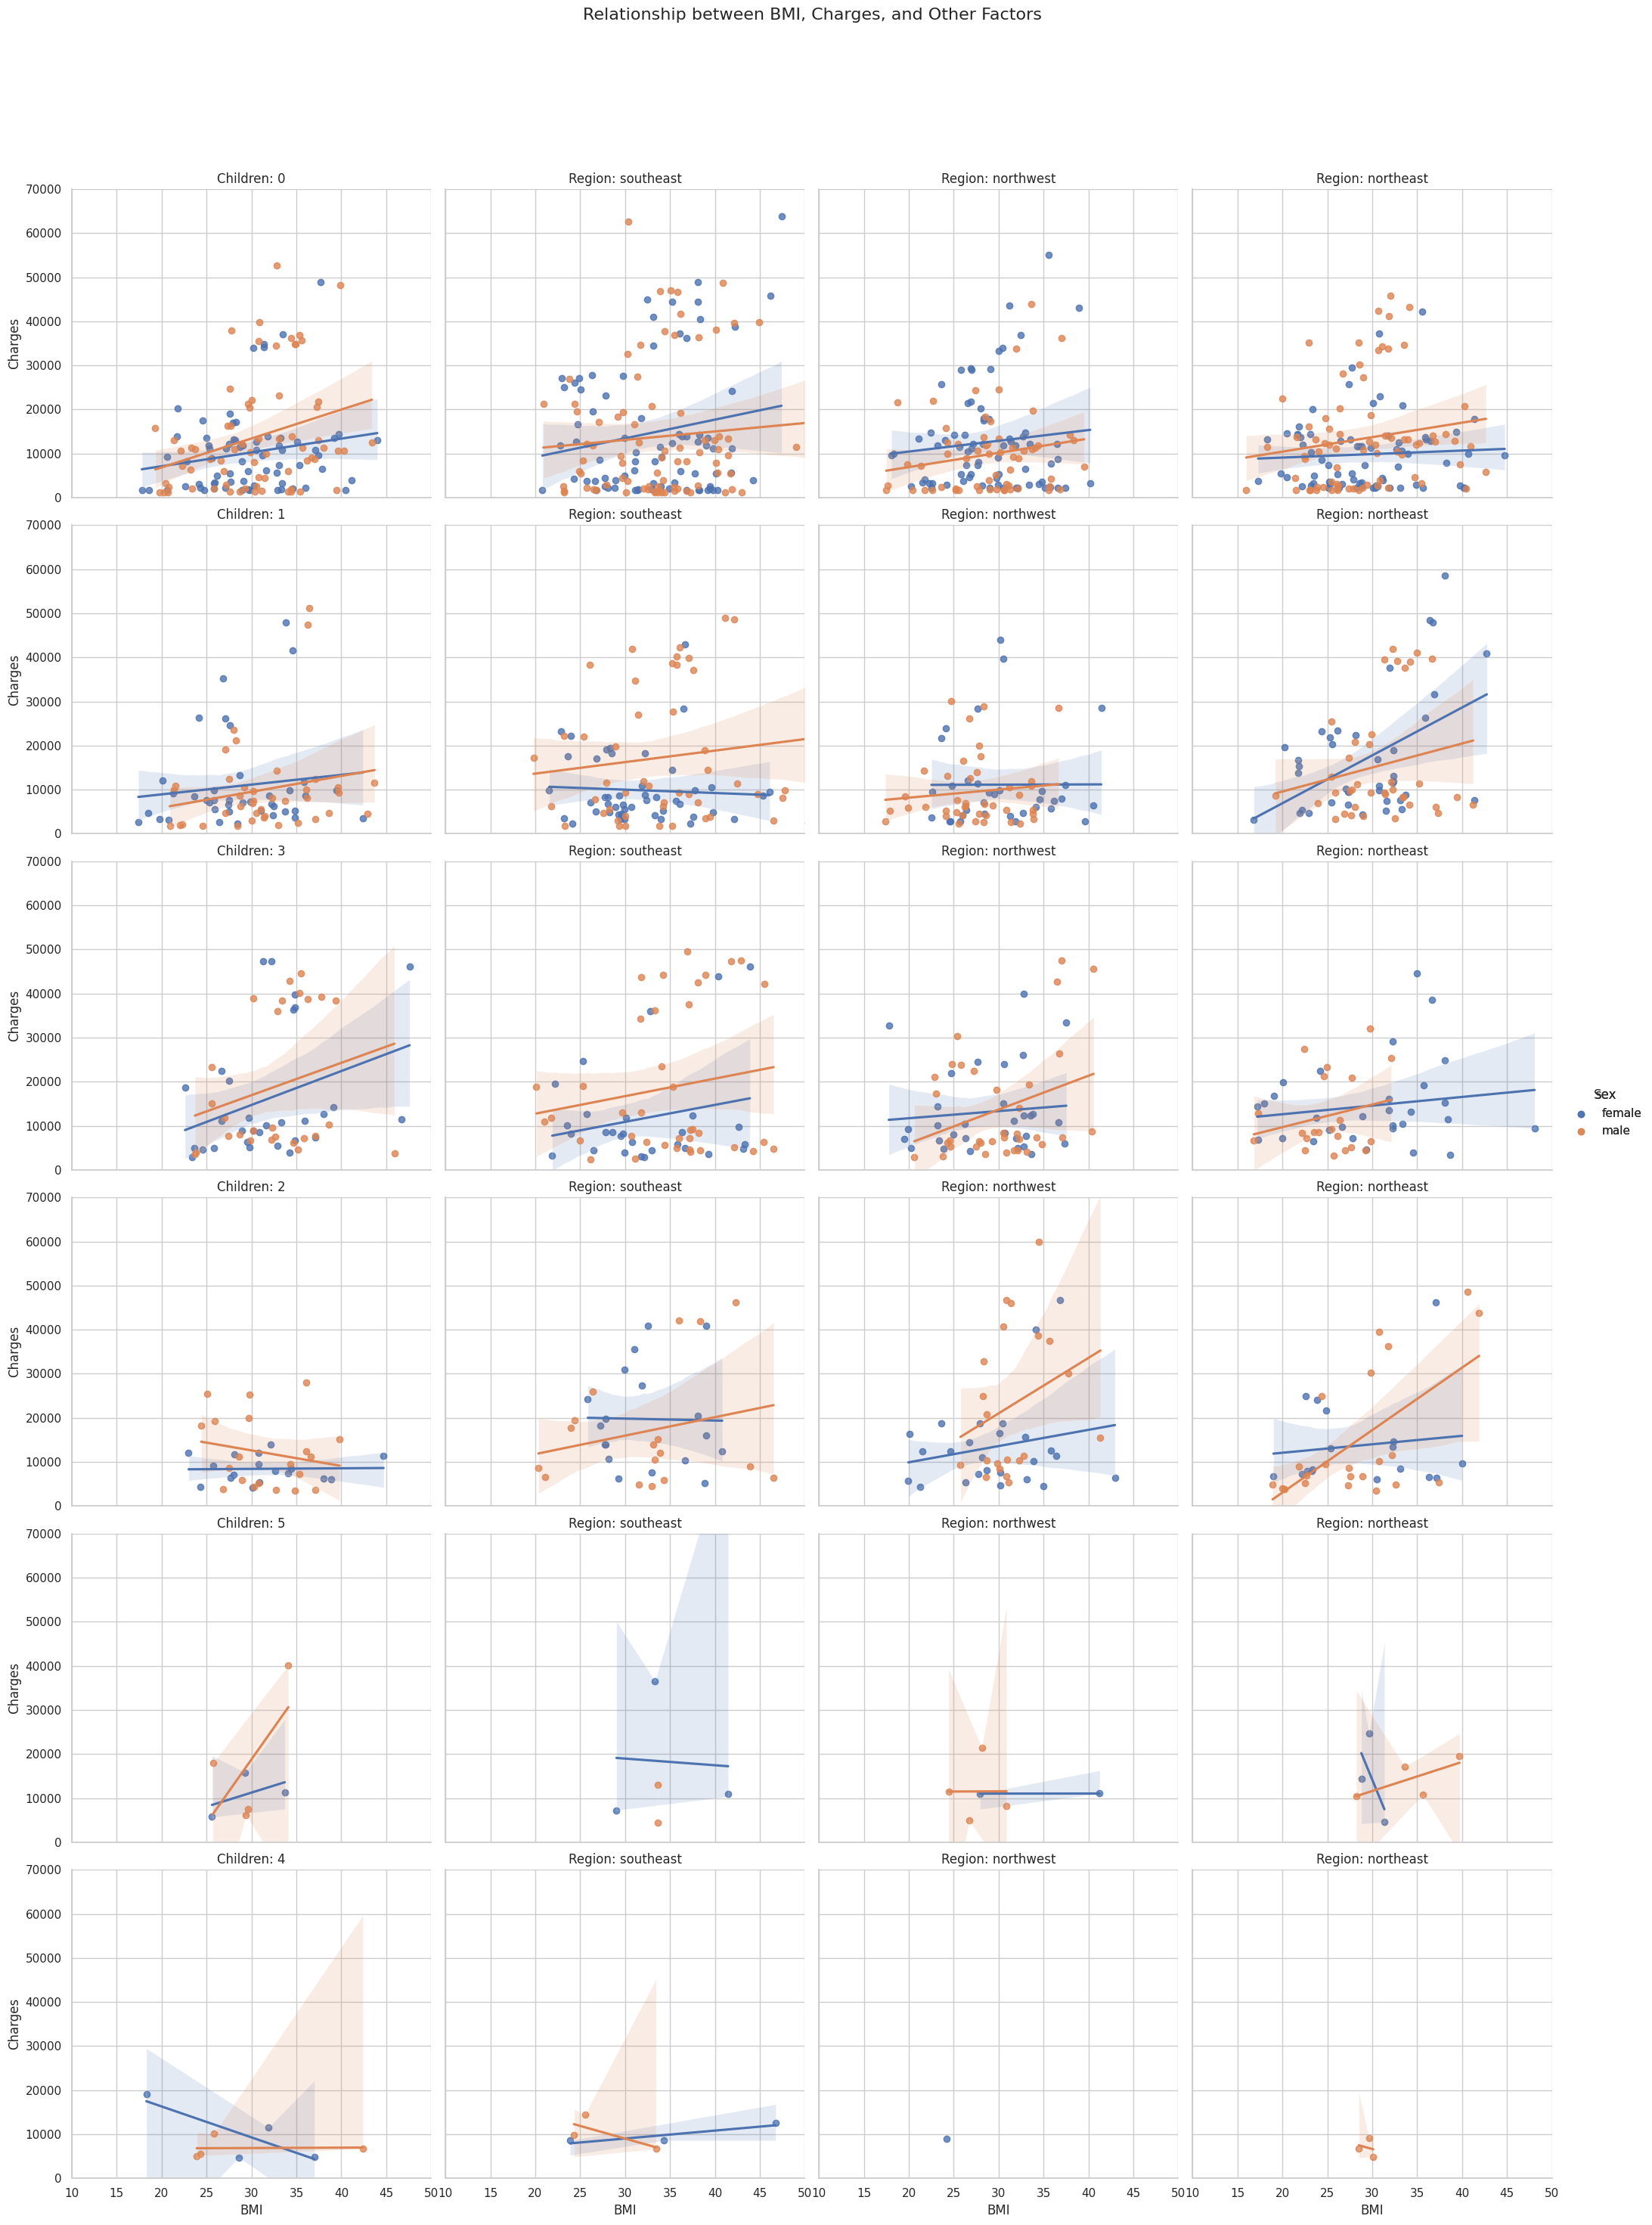

In [ ]:
# Checking and visualizing all variables together with relationships and standard deviation

sns.set(style="whitegrid")
g = sns.lmplot(x = "bmi", y = "charges", hue = "sex", col = "region", row = "children", data = df);

# Setting titles and labels
g.set_axis_labels("BMI", "Charges")
g.set_titles("Region: {col_name}", "Children: {row_name}")
g.set(xlim=(10, 50), ylim=(0, 70000))  # Set x and y axis limits based on previous
g.add_legend(title="Sex")

# Adding children titles to each subplot
for i, (child, ax) in enumerate(zip(df["children"].unique(), g.axes)):
    ax[0].set_title(f"Children: {child}")

plt.subplots_adjust(top=0.9)
plt.suptitle("Relationship between BMI, Charges, and Other Factors", size=16)


In [6]:
# Creating a new column based on age

age_bins = [0, 18, 30, 45, 60, 99]
age_labels = ["0-18", "18-30", "30-45", "45-60", "60+"]

df_num["age_group"] = pd.cut(df_num["age"], bins = age_bins, labels = age_labels, right=False)

In [24]:
# Min and max values of bmi
df["bmi"].max()

47.290000000000006

In [25]:
df["bmi"].min()

15.96

In [7]:
# Creating a new column based on bmi

bmi_bins = [15, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ["underweight", "normal weight", "overweight", "obese"]

df_num["bmi_group"] = pd.cut(df_num["bmi"], bins = bmi_bins, labels = bmi_labels, right=False)

In [8]:
df_num

,age,bmi,children,charges,age_group,bmi_group
0,19,27.900,0,16884.92400,18-30,overweight
1,18,33.770,1,1725.55230,18-30,obese
2,28,33.000,3,4449.46200,18-30,obese
3,33,22.705,0,21984.47061,30-45,normal weight
4,32,28.880,0,3866.85520,30-45,overweight
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,45-60,obese
1334,18,31.920,0,2205.98080,18-30,obese
1335,18,36.850,0,1629.83350,18-30,obese
1336,21,25.800,0,2007.94500,18-30,overweight


Text(0.5, 1.0, 'Avarage charges per age group')

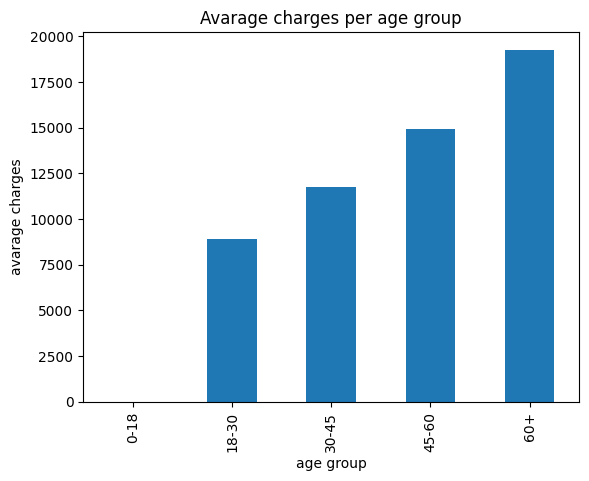

In [28]:
g = df_num.groupby("age_group")["charges"].mean()
g.plot(kind = "bar")
plt.xlabel("age group")
plt.ylabel("avarage charges")
plt.title("Avarage charges per age group")

- 60+ age group has the highest average charges

Text(0.5, 1.0, 'Avarage charges per bmi group')

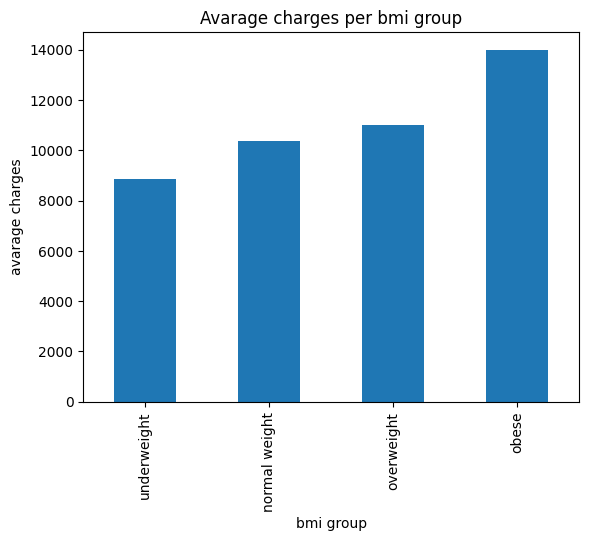

In [29]:
g = df_num.groupby("bmi_group")["charges"].mean()
g.plot(kind = "bar")
plt.xlabel("bmi group")
plt.ylabel("avarage charges")
plt.title("Avarage charges per bmi group")

- As weight increases, payments also increase

In [9]:
df[df_num.columns] = df_num
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-30,overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-30,obese
2,28,male,33.000,3,no,southeast,4449.46200,18-30,obese
3,33,male,22.705,0,no,northwest,21984.47061,30-45,normal weight
4,32,male,28.880,0,no,northwest,3866.85520,30-45,overweight


------

# Data Preprocessing

In [4]:
# Clipping method with IQR

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

for col in df_num.columns:
    outliers = (df_num[col] < lower_threshold[col]) | (df_num[col] > upper_threshold[col])
    df_num.loc[outliers, col] = upper_threshold[col]

df[df_num.columns] = df_num

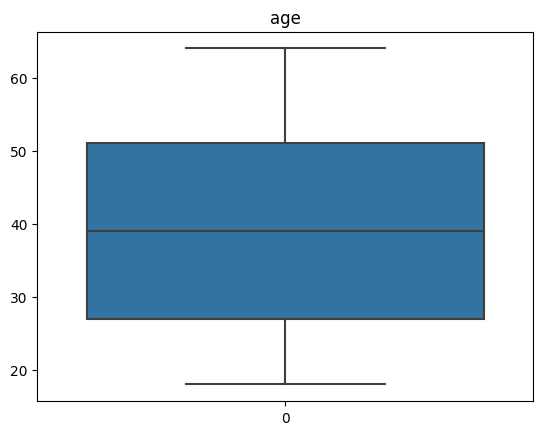

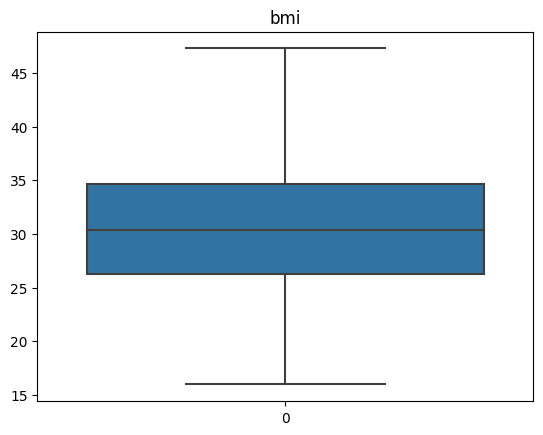

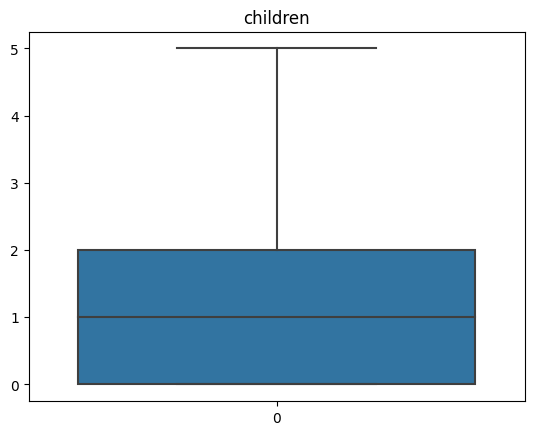

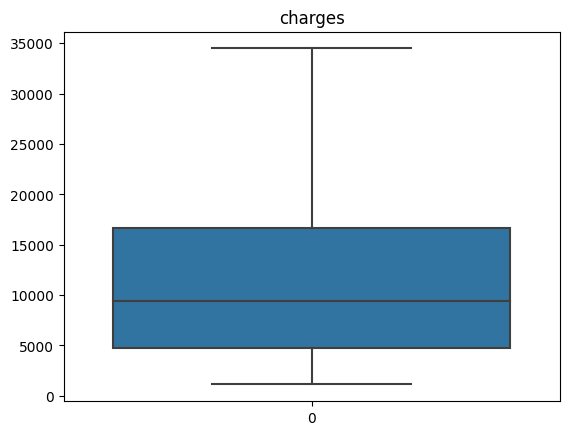

In [5]:
for column in df_num.columns:
  plt.title(column)
  sns.boxplot(df[column])
  plt.show(block = True)
 # As you can see there aren't any outlier value in our dataset

**Note:** I did not take bmi_group and age_group

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,50.304185,15.666236,18.0000,38.000000,57.000000,64.00000,64.00000
bmi,1338.0,39.862108,11.854004,15.9600,29.600000,37.100000,53.13000,53.13000
children,1338.0,2.684604,2.114682,0.0000,1.000000,2.000000,5.00000,5.00000
charges,1338.0,29577.922387,20969.972042,1607.5101,9791.871475,22205.276005,52590.82939,52590.82939


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.000000
bmi,1338.0,30.650034,6.056926,15.9600,26.29625,30.400,34.693750,47.290000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.000000
charges,1338.0,12479.369251,10158.056096,1121.8739,4740.28715,9382.033,16639.912515,34489.350562


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1338 non-null   int64   
 1   sex        1338 non-null   object  
 2   bmi        1338 non-null   float64 
 3   children   1338 non-null   int64   
 4   smoker     1338 non-null   object  
 5   region     1338 non-null   object  
 6   charges    1338 non-null   float64 
 7   age_group  1338 non-null   category
 8   bmi_group  1338 non-null   category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 76.3+ KB


In [11]:
df= df.astype({
    "age_group": "object",
    "bmi_group": "object"
})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   age_group  1338 non-null   object 
 8   bmi_group  1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [14]:
# One-Hot Encoding

# before One-Hot I will save charges

df_c = df.copy()
charges = df_c["charges"].copy()
df_encoded = df_c.drop("charges", axis = 1)

df_encoded.head()

,age,sex,bmi,children,smoker,region,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,18-30,overweight
1,18,male,33.770,1,no,southeast,18-30,obese
2,28,male,33.000,3,no,southeast,18-30,obese
3,33,male,22.705,0,no,northwest,30-45,normal weight
4,32,male,28.880,0,no,northwest,30-45,overweight


In [15]:
df_encoded = pd.get_dummies(df_encoded[['sex', 'smoker', 'region', 'age_group', 'bmi_group']])
df_encoded.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_group_18-30,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_normal weight,bmi_group_obese,bmi_group_overweight,bmi_group_underweight
0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0
2,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0
3,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [17]:
# getting rid of the dummy variable trap

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_obese,bmi_group_overweight,bmi_group_underweight
0,19,27.900,0,16884.92400,0,1,0,0,1,0,0,0,0,1,0
1,18,33.770,1,1725.55230,1,0,0,1,0,0,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,1,0,0,0,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,1,0,0,0,1,0


In [18]:
df_encoded["charges"] = charges
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_obese,bmi_group_overweight,bmi_group_underweight
0,19,27.900,0,16884.92400,0,1,0,0,1,0,0,0,0,1,0
1,18,33.770,1,1725.55230,1,0,0,1,0,0,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,1,0,0,0,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,1,0,0,0,1,0


In [21]:
# Scaling with StandartScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_obese,bmi_group_overweight,bmi_group_underweight
0,-1.438764,-0.454201,-0.908614,0.433863,-1.010519,1.970587,-0.566418,-0.611324,1.765481,-0.643721,-0.670538,-0.305184,-1.077753,1.596581,-0.123185
1,-1.509965,0.515300,-0.078767,-1.059045,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-0.643721,-0.670538,-0.305184,0.927857,-0.626338,-0.123185
2,-0.797954,0.388125,1.580926,-0.790792,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-0.643721,-0.670538,-0.305184,0.927857,-0.626338,-0.123185
3,-0.441948,-1.312218,-0.908614,0.936070,0.989591,-0.507463,1.765481,-0.611324,-0.566418,1.553469,-0.670538,-0.305184,-1.077753,-0.626338,-0.123185
4,-0.513149,-0.292342,-0.908614,-0.848168,0.989591,-0.507463,1.765481,-0.611324,-0.566418,1.553469,-0.670538,-0.305184,-1.077753,1.596581,-0.123185


In [25]:
# Scaling with RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_encoded)


df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled.head()

# I scaled with two different method but I choosed the robust scaler because of it has resistance to the outliers

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_obese,bmi_group_overweight,bmi_group_underweight
0,-0.833333,-0.297708,-0.5,0.630515,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0
1,-0.875000,0.401310,0.0,-0.643422,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.458333,0.309616,1.0,-0.414515,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.250000,-0.916344,-0.5,1.059062,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
4,-0.291667,-0.181006,-0.5,-0.463475,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0


In [29]:
# Seperating data

y = df_scaled['charges'] # dependent veriable
y[0:10]

0    0.630515
1   -0.643422
2   -0.414515
3    1.059062
4   -0.463475
5   -0.472739
6   -0.095923
7   -0.176520
8   -0.250060
9    1.642161
Name: charges, dtype: float64

In [30]:
X = df_scaled.drop(["charges"], axis=1) # independent veriable
X[0:10]

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_obese,bmi_group_overweight,bmi_group_underweight
0,-0.833333,-0.297708,-0.5,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0
1,-0.875000,0.401310,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.458333,0.309616,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.250000,-0.916344,-0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
4,-0.291667,-0.181006,-0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0
5,-0.333333,-0.554927,-0.5,-1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0
6,0.291667,0.362013,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,-0.083333,-0.316761,1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0
8,-0.083333,-0.067877,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0
9,0.875000,-0.543019,-0.5,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0


In [51]:
# Spliting data into test and train with 0.20 test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df_scaled.copy()

print("training", training.shape)

X_train (1070, 14)
y_train (1070,)
X_test (268, 14)
y_test (268,)
training (1338, 15)


---

## Modelling

### Linear Regression

In [36]:
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.40480571652019137


**Model Tunning**

In [48]:
# Just tried another random_state value for to see RMSE score, it is not a real model tunning
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=144)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

np.sqrt(-cross_val_score(model, X_train, y_train, cv = 10,
                scoring = "neg_mean_squared_error")).mean()

0.43390466452138987

## PCR Regression

In [52]:
pca = PCA()

X_reduced_train = pca.fit_transform(X_train)

X_reduced_train[0:1,:]

array([[-1.10929118,  0.97778649,  0.29373463,  0.15962416,  0.15012488,
         0.85348723, -0.71276441,  0.29246512, -0.16177794, -0.23250032,
        -0.22698134,  0.10465188, -0.07057826, -0.09791667]])

In [41]:
# assumptions
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([24.71, 39.67, 51.94, 60.  , 67.89])

In [53]:
pcr_model = model.fit(X_reduced_train, y_train)

y_pred = pcr_model.predict(X_reduced_train)

np.sqrt(mean_squared_error(y_train, y_pred)) # training error

0.42663269458262193

In [54]:
pca2 = PCA()

X_reduced_test = pca2.fit_transform(X_test)

y_pred = pcr_model.predict(X_reduced_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",rmse)

RMSE: 0.7058553372414758


**Model Tunning**

In [56]:
# The hyperparameter that needs to be optimized is the number of components
lm = LinearRegression()

pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)

y_pred = pcr_model.predict(X_reduced_test[:,0:10])

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.706843772589385


In [59]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [60]:
RMSE = []

In [61]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):

    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                       X_reduced_train[:,:i],
                                                       y_train.ravel(),
                                                       cv=cv_10,
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

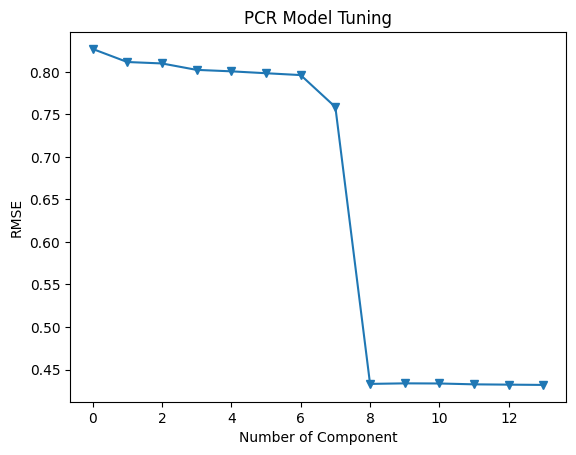

In [63]:
plt.plot(RMSE, '-v')
plt.xlabel('Number of Component')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning');

In [68]:
# We determined the optimum number of components by using the cross validation method and the train set of the optimum number of components, that is, it is 13.

lm = LinearRegression()

pcr_model = lm.fit(X_reduced_train[:,0:13], y_train)

y_pred = pcr_model.predict(X_reduced_test[:,0:13])


RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",RMSE)

RMSE: 0.7064513453067407


In [95]:
# Tunning with randomized search
pca = PCA()
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)


model = LinearRegression()

In [99]:
# Possible value ranges of hyperparameters
param_dist = {
    'fit_intercept': [True, False]
}

In [100]:
# Creating Randomized SearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

In [101]:
random_search.fit(X_reduced_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error')

In [102]:
best_model = random_search.best_estimator_

In [103]:
y_pred = best_model.predict(X_reduced_test)

In [104]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.4228887762304749


## Lasso Regression

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [77]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

Text(0, 0.5, 'weights')

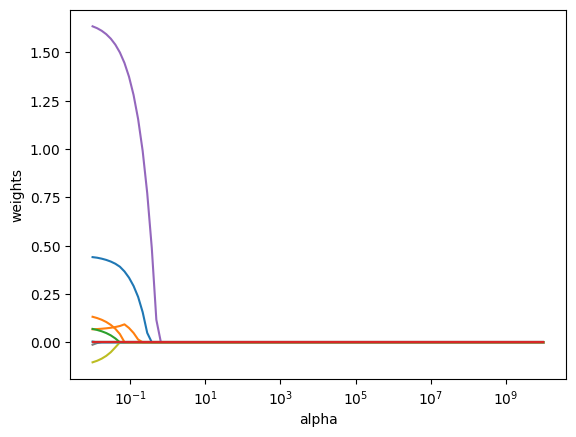

In [78]:
lasso = Lasso()
lambdas = 10**np.linspace(10,-2,100)*0.5
coefs = []

for i in lambdas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [79]:
y_pred = lasso_model.predict(X_test)

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",rmse)

RMSE: 0.5463614607622823


**Model Tunning**

In [81]:
# Tunning with Grid Search
param_grid = {'alpha': np.linspace(0.01, 1, 100)}

In [82]:
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.005),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_mean_squared_error')

In [83]:
best_lasso = grid_search.best_estimator_

In [84]:
y_pred = best_lasso.predict(X_test)

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best RMSE:", rmse)

Best RMSE: 0.42739875472357636


## Ridge Regression

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

ridge_model

Ridge(alpha=0.1)

In [87]:
y_pred = ridge_model.predict(X_test)

In [88]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE",rmse)

RMSE 0.42289735938492695


**Model Tunning**

In [89]:
ridge_model = Ridge()

# Setting hyperparameters (alpha values)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [90]:
# Testing model with grid search

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [91]:
# Taking the best parameters
best_ridge_model = grid_search.best_estimator_

In [92]:
y_pred = best_ridge_model.predict(X_test)

In [93]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best RMSE:", rmse)

Best RMSE: 0.4230361996269676


## ElasticNet Regression

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

enet_model = ElasticNet().fit(X_train, y_train)

In [106]:
enet_model.predict(X_test)

array([0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073989,
       0.26073989, 0.26073989, 0.26073989, 0.26073989, 0.26073

In [107]:
y_pred = enet_model.predict(X_test)

In [108]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.8670955269938586

In [109]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': [0.2, 0.5, 0.8],
    'fit_intercept': [True, False]
}

model = ElasticNet()

In [110]:
grid_search = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             scoring='neg_mean_squared_error')

In [112]:
best_model = grid_search.best_estimator_

In [113]:
y_pred = best_model.predict(X_test)

In [114]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.4275222036139038


#  Model Evaluation and Choosing The Best Model


- **ElasticNet:** RMSE = 0.42752

- **Ridge:** RMSE = 0.42303

- **Lasso:** RMSE = 0.427398

- **PCR:** RMSE = 0.422888

- **Linear Reg:** RMSE = 0.43390

In this case the best model is ***PCR*** model.